## Exploratory Analysis - Austin Shelter

#### Inspiration¶ 
I wanted to do exploratory analysis on something that interested me, and found this dataset for the Austin Animal Shelter. I think what animal shelters do is great, and this one in particular is a no-kill shelter, that had some data on Pit Bulls so I decided to explore it a bit. Unlike many, I want to adopt a Pit Bull because after living with one, I think they are great dogs. One hypothesis I wanted to test was that Pit Bulls are, in general, less desired than other dog breeds. I think this bad reputation is because there are a number of myths and stereotypes about "pitbull-type" dogs that are either anecdotal and misleading or entirely false. 

In [28]:
# Import Useful Libraries For Project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
from math import pi
pd.options.mode.chained_assignment = None

From this donut plot it is evident that the vast majority of intakes are in normal condition. Sick, Injured, and Aged (conditions that are more likely to lead to an unfortunate outcome such as Euthanasia) are only a small percentage.

#### Reading, Exploring And Cleaning

In [3]:
df = pd.read_csv('C:\\Users\\Peace Orazu\\Downloads\\aac_intakes_outcomes.csv')
print(df.shape)
df.head()

(79672, 41)


,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [4]:
df.describe()

,age_upon_outcome_(days),age_upon_outcome_(years),outcome_month,outcome_year,outcome_hour,outcome_number,dob_year,dob_month,count,age_upon_intake_(days),age_upon_intake_(years),intake_month,intake_year,intake_hour,intake_number,time_in_shelter_days
count,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.0,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000,79672.000000
mean,782.046127,2.142592,6.655425,2015.472563,14.297306,1.126820,2013.254870,6.310310,1.0,769.341701,2.107785,6.584032,2015.436101,13.487022,1.126820,16.757116
std,1058.528519,2.900078,3.414284,1.305944,3.774317,0.456057,3.216517,3.289077,0.0,1056.009040,2.893175,3.366579,1.303157,3.121173,0.456057,41.679359
min,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000,1991.000000,1.000000,1.0,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000,0.000000
25%,90.000000,0.246575,4.000000,2014.000000,12.000000,1.000000,2012.000000,4.000000,1.0,60.000000,0.164384,4.000000,2014.000000,11.000000,1.000000,1.102083
50%,365.000000,1.000000,7.000000,2015.000000,15.000000,1.000000,2014.000000,6.000000,1.0,365.000000,1.000000,7.000000,2015.000000,13.000000,1.000000,4.987153
75%,1095.000000,3.000000,10.000000,2017.000000,17.000000,1.000000,2015.000000,9.000000,1.0,1095.000000,3.000000,10.000000,2017.000000,16.000000,1.000000,13.610764
max,9125.000000,25.000000,12.000000,2018.000000,23.000000,13.000000,2018.000000,12.000000,1.0,9125.000000,25.000000,12.000000,2018.000000,23.000000,13.000000,1606.194444


#### By Animal Type

Text(0, 0.5, 'Age (Years)')

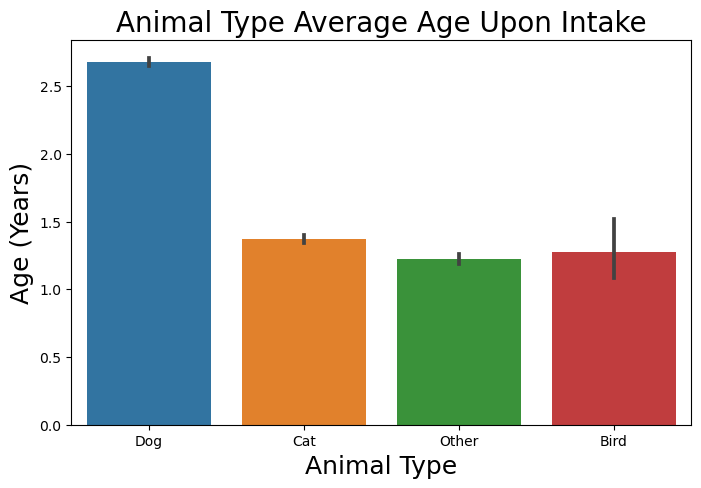

In [5]:
# Plot bar plot (animal type, age)
plt.figure(figsize=(8,5))
sns.barplot(x=df['animal_type'], y=df['age_upon_intake_(years)'])
plt.title('Animal Type Average Age Upon Intake', fontsize=20);
plt.xlabel('Animal Type', fontsize=18)
plt.ylabel('Age (Years)', fontsize=18)

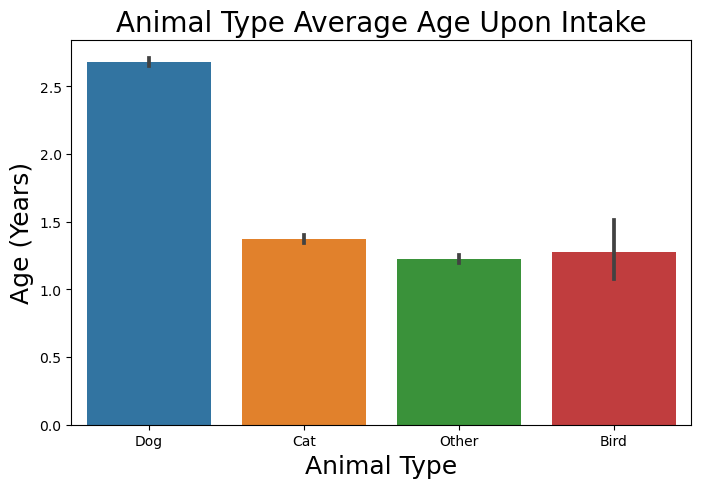

In [6]:
# Plot bar plot (animal type, age)
plt.figure(figsize=(8,5))
sns.barplot(x=df['animal_type'], y=df['age_upon_intake_(years)'])
plt.title('Animal Type Average Age Upon Intake', fontsize=20);
plt.xlabel('Animal Type', fontsize=18)
plt.ylabel('Age (Years)', fontsize=18);

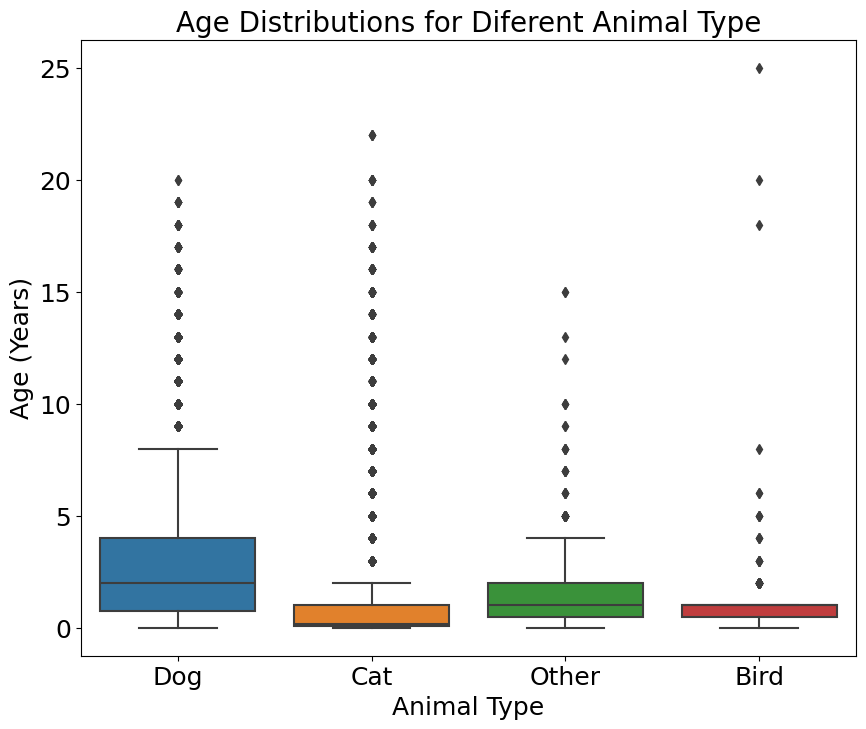

In [7]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='animal_type', y='age_upon_intake_(years)', data=df, orient='v')
plt.title('Age Distributions for Diferent Animal Type', fontsize=20);
plt.xlabel('Animal Type', fontsize=18)
plt.ylabel('Age (Years)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

#### By Intake Condition - All

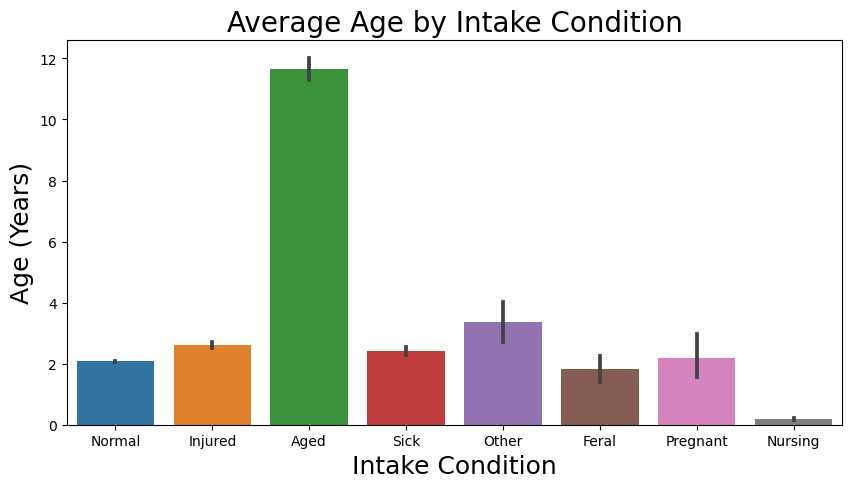

In [8]:
# Plot bar plot (intake_condition, age)
plt.figure(figsize=(10,5))
sns.barplot(x=df['intake_condition'], y=df['age_upon_intake_(years)'])
plt.title('Average Age by Intake Condition', fontsize=20);
plt.xlabel('Intake Condition', fontsize=18)
plt.ylabel('Age (Years)', fontsize=18);

- Bar plot gives us an estimate of central tendency for a numeric variable (height of each rectangle) and an indication of the uncertainty around that estimate (error bars in black).
- Apart from "Other" and "Pregnant", which have a larger error bar, the mean value seems to accurately represent the data of all the intake conditions.


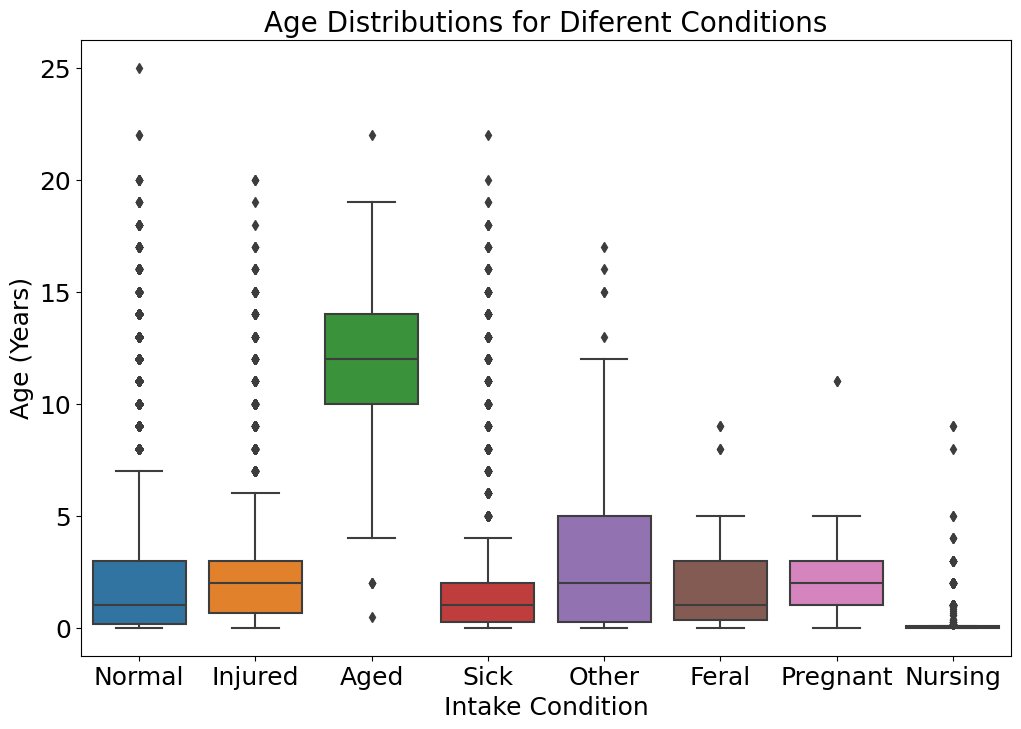

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='intake_condition', y='age_upon_intake_(years)', data=df, orient='v')
plt.title('Age Distributions for Diferent Conditions', fontsize=20)
plt.xlabel('Intake Condition', fontsize=18)
plt.ylabel('Age (Years)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18);

- The age for intake condition aged was mainly between 10 and 15 years.
- For all other intake conditions, the age was mainly less than 5 years.

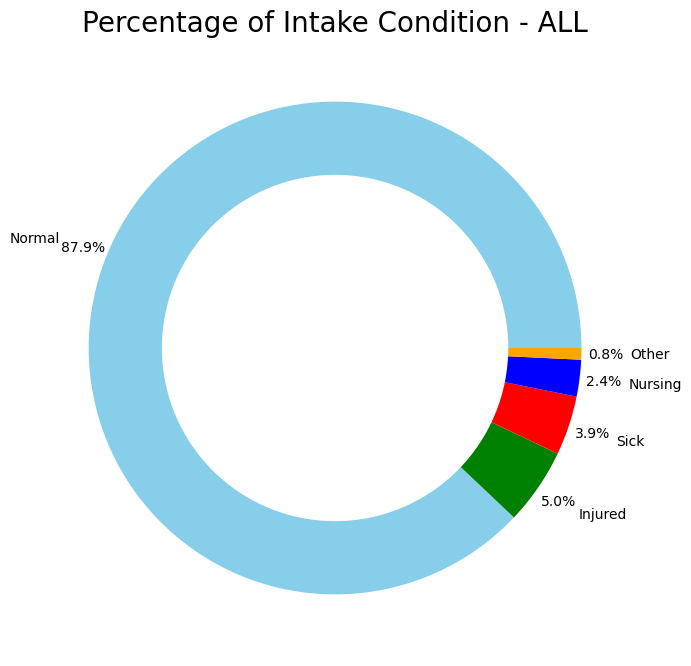

In [10]:
# grouping dataset by intake condition, counting, and sorting.
by_condition = df.groupby(['intake_condition'])[['count']].sum().reset_index().sort_values(by='count', ascending=False)
# grouping conditions with low count into 'Other' category for illustration purposes
for i, row in by_condition.iterrows():
    if (by_condition.intake_condition[i]=='Aged') or (by_condition.intake_condition[i]=='Feral') or (by_condition.intake_condition[i] == 'Pregnant'):
        by_condition.intake_condition[i]='Other'       
by_condition = by_condition.groupby(['intake_condition'])[['count']].sum().reset_index().sort_values(by='count', ascending=False)
# Donut Plot
plt.figure(figsize=(8,8))
names = by_condition['intake_condition']
size_of_groups = by_condition['count']
plt.pie(size_of_groups, labels=names, colors=['skyblue','green','red','blue','orange'], 
        autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2)  # Create a pieplot
my_circle = plt.Circle( (0,0), 0.7, color='white') # add a circle at the center
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Percentage of Intake Condition - ALL', fontsize=20);
plt.show()

- From this donut plot it is evident that the vast majority of intakes are in normal condition. Sick, Injured, and Aged (conditions that are more likely to lead to an unfortunate outcome such as Euthanasia) are only a small percentage.

#### By Intake Weekday

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


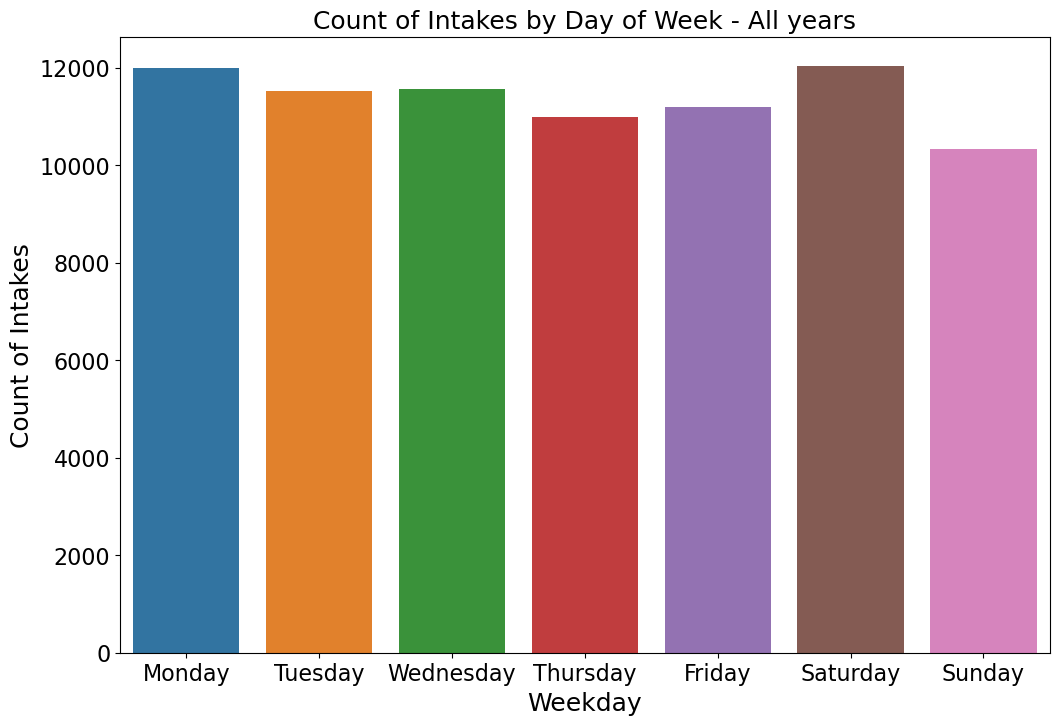

In [11]:
# pd.Categorical to order the weekdays starting from Monday
df['intake_weekday'] = pd.Categorical(df['intake_weekday'], ordered=True,
                                      categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(12, 8))
sns.countplot(x='intake_weekday', data=df, orient='v')
plt.title('Count of Intakes by Day of Week - All years', fontsize=18)
plt.xlabel('Weekday', fontsize=18)
plt.ylabel('Count of Intakes', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

By intake month

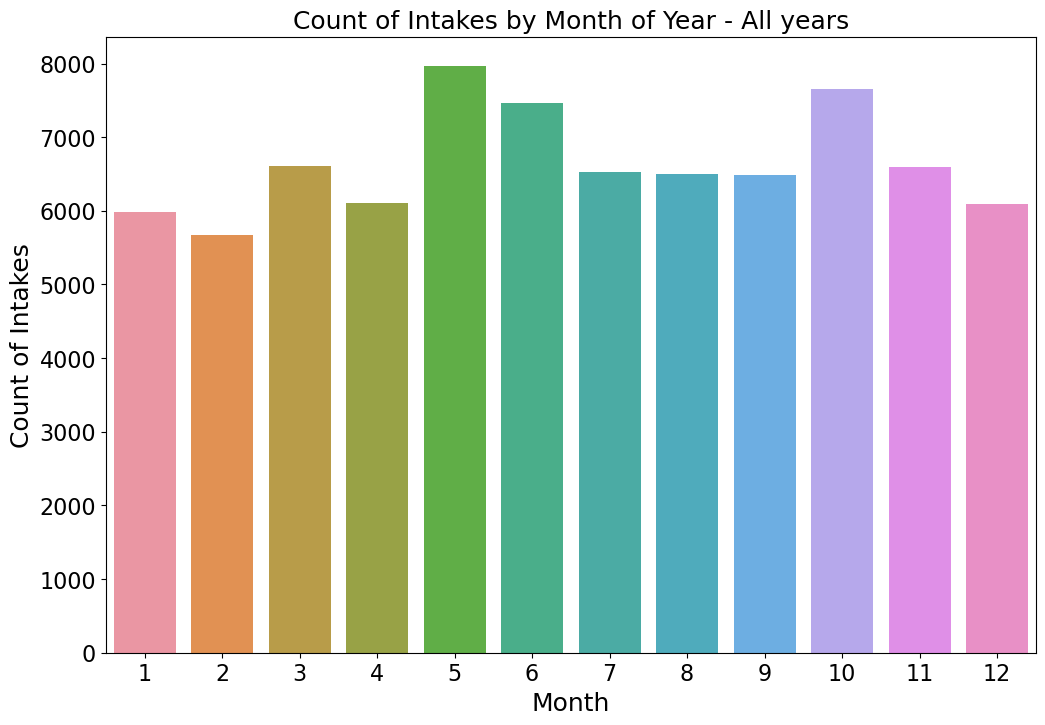

In [12]:
plt.figure(figsize=(12, 8))
sns.countplot(x='intake_month', data=df, orient='v')
plt.title('Count of Intakes by Month of Year - All years', fontsize=18)
plt.xlabel('Month', fontsize=18)
plt.ylabel('Count of Intakes', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);

- We can see that May and October are the months with the most intakes.

#### BY intake Type

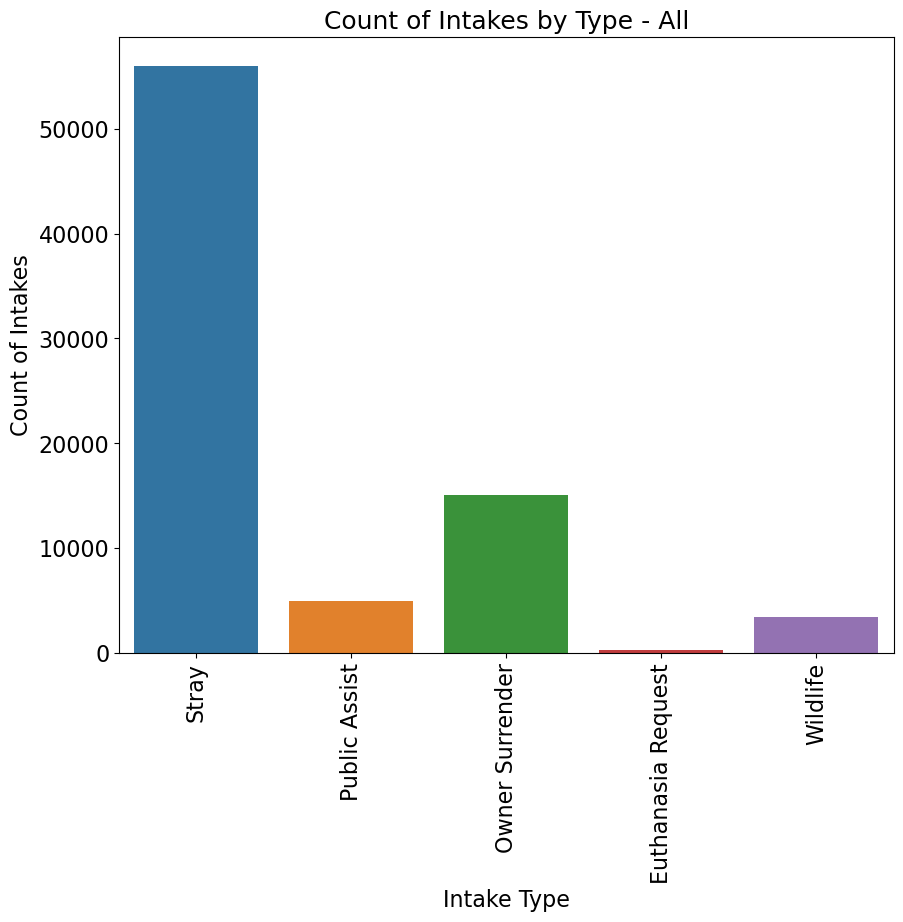

In [13]:
plt.figure(figsize=(10, 8))
sns.countplot(x='intake_type', data=df, orient='v')
plt.title('Count of Intakes by Type - All', fontsize=18)
plt.xlabel('Intake Type', fontsize=16)
plt.ylabel('Count of Intakes', fontsize=16)
plt.xticks(fontsize=16, rotation='vertical')
plt.yticks(fontsize=16);

- The vast majority of intakes are Stray animals, with Owner Surrender coming second.

#### By Outcome Type

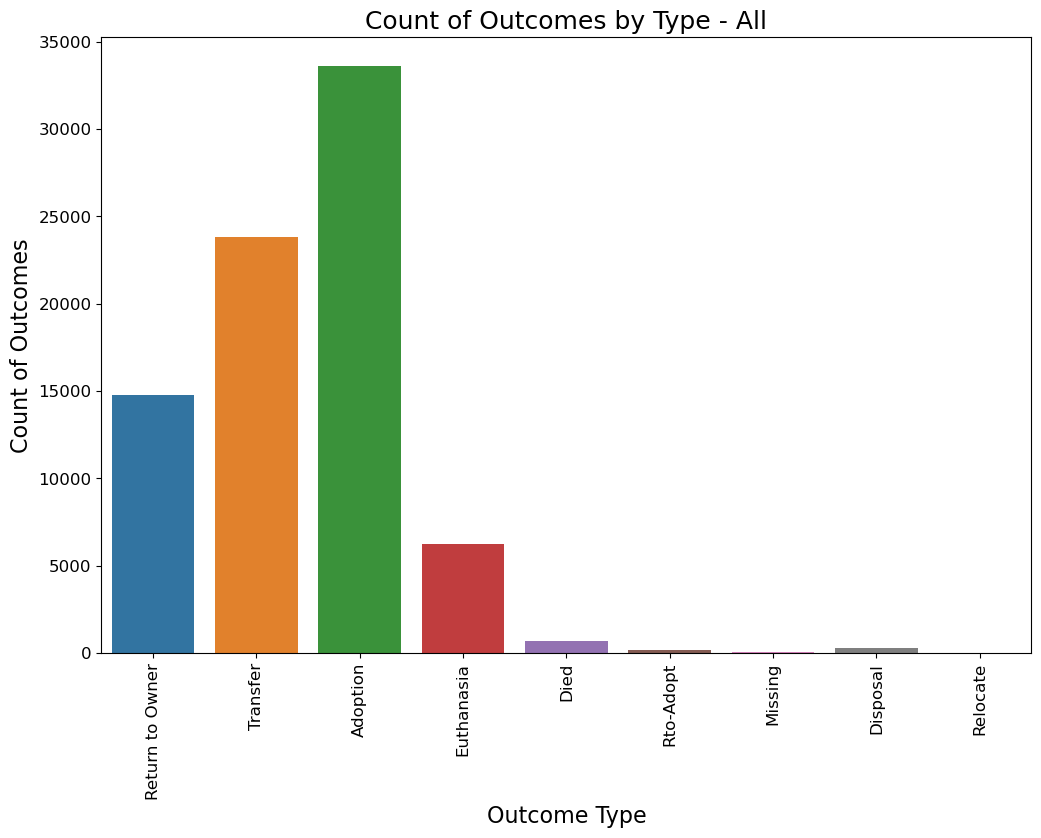

In [14]:
plt.figure(figsize=(12, 8))
sns.countplot(x='outcome_type', data=df, orient='v')
plt.title('Count of Outcomes by Type - All', fontsize=18)
plt.xlabel('Outcome Type', fontsize=16)
plt.ylabel('Count of Outcomes', fontsize=16)
plt.xticks(fontsize=12, rotation='vertical')
plt.yticks(fontsize=12);

In [15]:
# Creating columns for day of year
df['intake_month_day'] = pd.DatetimeIndex(df['intake_datetime']).strftime('%m-%d')
df['outcome_month_day'] = pd.DatetimeIndex(df['outcome_datetime']).strftime('%m-%d')
by_intake_md = df.groupby('intake_month_day')[['count']].sum()
by_outcome_md = df.groupby('outcome_month_day')[['count']].sum()
by_intake_md['md'] = by_intake_md.index
by_intake_md = by_intake_md.rename(columns={'count':'intake_count'})
by_outcome_md['md'] = by_outcome_md.index
by_outcome_md = by_outcome_md.rename(columns={'count':'outcome_count'})
df_md = pd.merge(by_intake_md, by_outcome_md, on='md')
df_md.sort_values('outcome_count').tail() # August 19th is the day with most outcomes.

,intake_count,md,outcome_count
182,192,07-01,323
193,178,07-12,325
190,301,07-09,341
199,179,07-18,343
231,206,08-19,353


- Count of Outcomes by Month and Day of Year

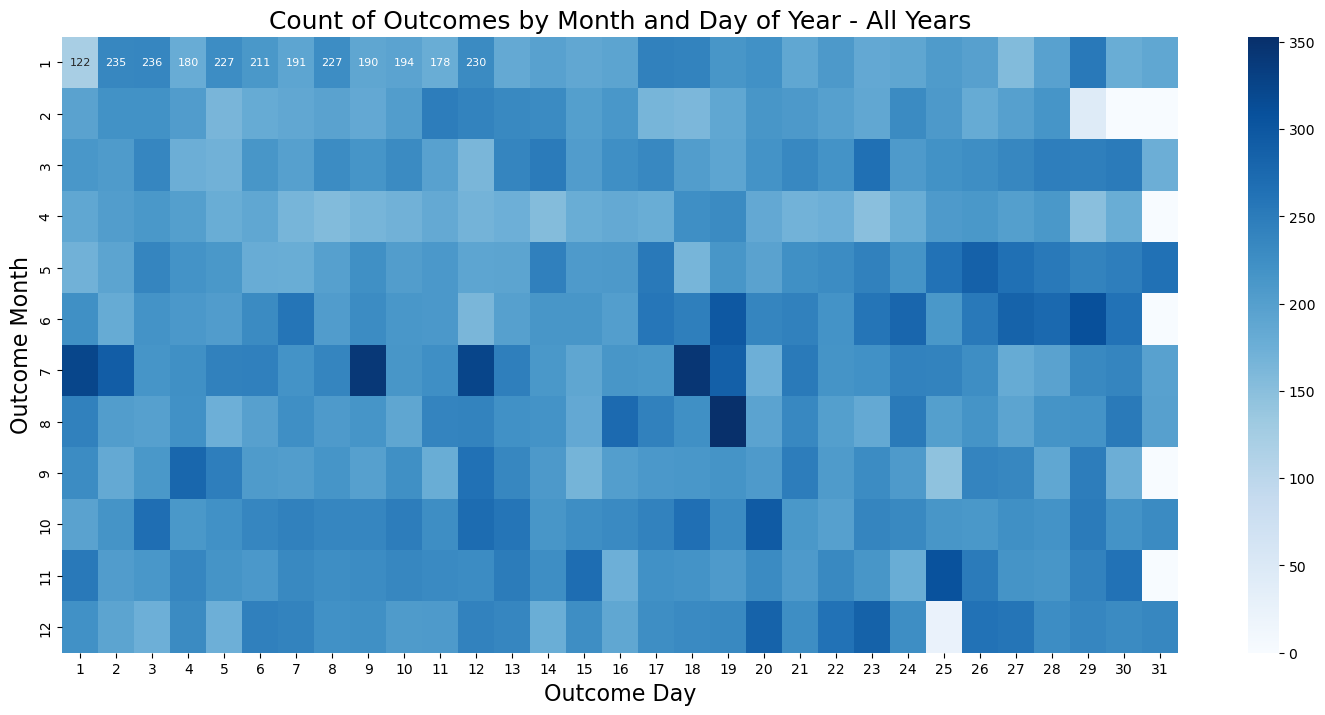

In [16]:
# Creating columns for day of month
df['outcome_day'] = pd.DatetimeIndex(df['outcome_datetime']).day
# Manipulating data to feed pivot table to then feed to seaborn heatmap
by_outcome_md = df.groupby(['outcome_day','outcome_month'])[['count']].sum()
by_outcome_md = by_outcome_md.reset_index(level=[0,1]) # to go from multiIndex to singleIndex
pivoted_table = by_outcome_md.pivot(index='outcome_month', columns='outcome_day', values='count')
pivoted_table.fillna(0, inplace=True)
plt.figure(figsize=(18, 8))
sns.heatmap(pivoted_table, cmap='Blues', annot=True, fmt='g', annot_kws={'size': 8})
plt.title('Count of Outcomes by Month and Day of Year - All Years', fontsize=18);
plt.xlabel('Outcome Day', fontsize=16)
plt.ylabel('Outcome Month', fontsize=16);

- We can see that December 25th (Christmas day) is the one with the least number of outcomes for all years (2013 to 2018). This makes sense as adopting an animal may not be in the top priorities for Christmas Day. Remember Adoption is the most significant contributor to the number of outcomes.
- August 19th is the day with the most Outcomes - with most being Adoption, it is agreat day for pets. Also notice that July has several days with the most number of outcomes. After a little bit of research, I found out that some cities waive adoptions fees during July as they prepare for shelters to be filled beyond capacity with lost animals who become frightened by 4th of July fireworks and run away.

#### By Animal Type - Digging Deeper

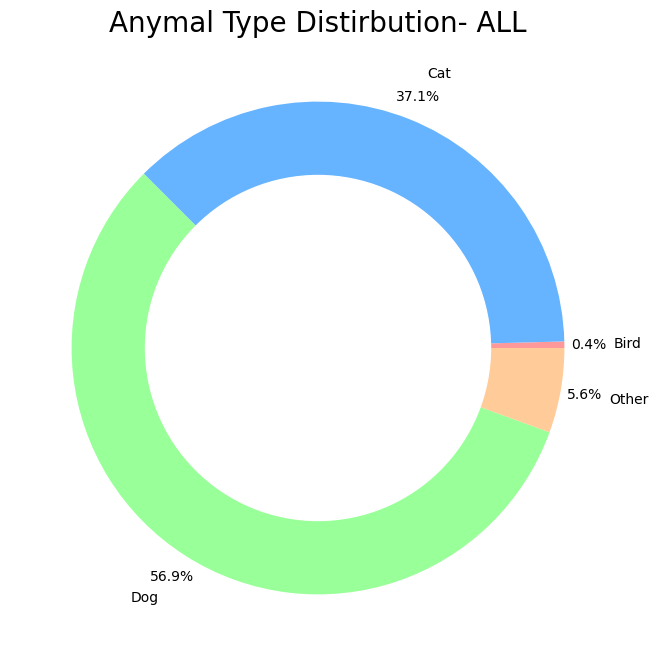

In [17]:
# grouping dataset by anymal type and counting
by_at = df.groupby(['animal_type'])[['count']].sum()
# Donut Plot
plt.figure(figsize=(8,8))
names = by_at.index
size_of_groups = by_at['count']
plt.pie(size_of_groups, labels=names, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], 
        autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2)  # Create a pieplot
my_circle = plt.Circle( (0,0), 0.7, color='white') # add a circle at the center
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Anymal Type Distirbution- ALL', fontsize=20);
plt.show()

- As expected, dogs and cats are the majority, with ~94%. The other 6% being birds and other types of animals. I wonder what those are.

In [18]:
Other = df[df['animal_type']=='Other']
# preping data for 1st donut plot - left
Other1 = Other.groupby(['breed'])[['count']].sum().reset_index().sort_values(by='count', ascending=False).head(12)
names1 = Other1['breed']
size_of_groups1 = Other1['count']
#preping data for 2nd donut plot - right
Other2 = Other.groupby(['outcome_type'])[['count']].sum().reset_index().sort_values(by='count', ascending=False)
names2 = Other2['outcome_type']
size_of_groups2 = Other2['count']

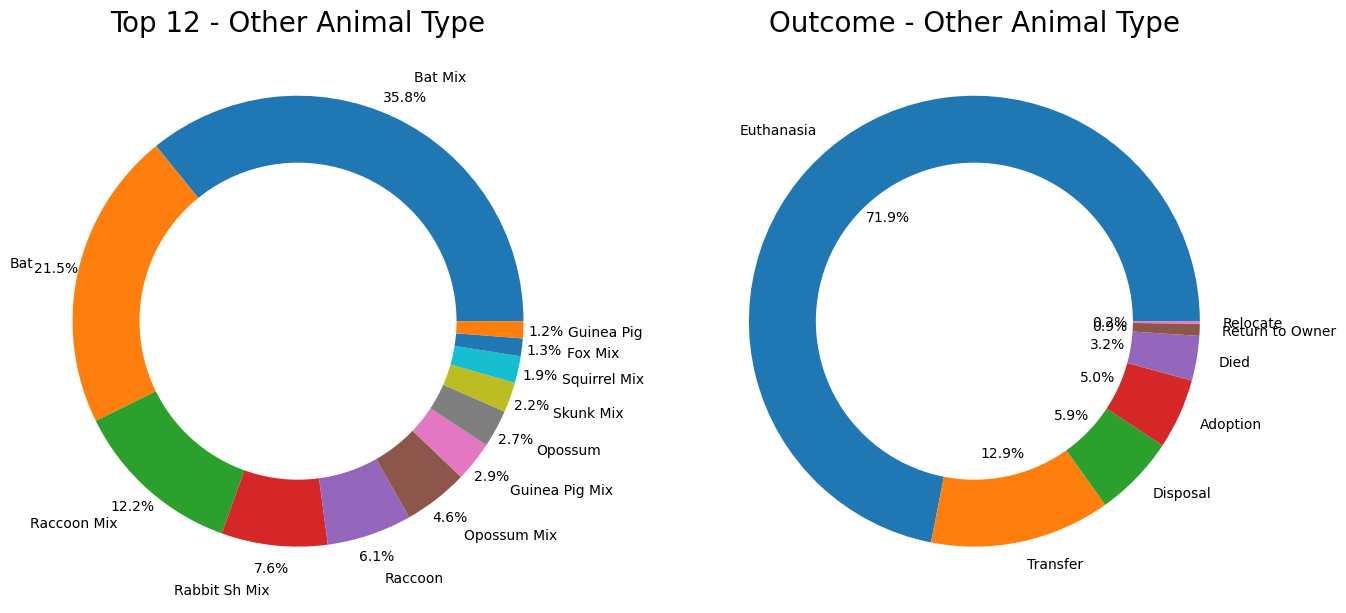

In [24]:
fig = plt.figure(figsize=(16,8))
plt.subplot(121)
ax = plt.pie(size_of_groups1, labels=names1, autopct='%1.1f%%', pctdistance=1.1, labeldistance=1.2)  # Create a pieplot
my_circle = plt.Circle( (0,0), 0.7, color='white') # add a circle at the center
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Top 12 - Other Animal Type', fontsize=20);
plt.subplot(122)
ax = plt.pie(size_of_groups2, labels=names2, autopct='%1.1f%%')
my_circle = plt.Circle( (0,0), 0.7, color='white') # add a circle at the center
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Outcome - Other Animal Type', fontsize=20);
fig.set_facecolor('w')

- From donutplot on left - "Top 12 - Other Animal Type":
- Bats and Bats mixes make up more than 50% of the Top 12 in the Other animal type. I was expecting Rabbit to be the one with the majority.
- Skunk and Guinea Pigs made it to the top 12... impressive. Not sure if I ever met anyone that has one.
- From donutplot on right: "Outcome - Other Animal Type":
- Most of this other interesting animals, 71.9%, end up with an outcome of Euthanasia.
- Only 5% of them are adopted.

  
#### Is the distribution of outcomes even across animal types?

In [25]:
by_ao = df.groupby(['animal_type','outcome_type'])[['count']].sum()
by_ao = by_ao.reset_index(level=[0,1]) # to go from multiIndex to singleIndex
by_ao.animal_type.unique()

array(['Bird', 'Cat', 'Dog', 'Other'], dtype=object)

In [26]:
# Values of each group
Adoption = by_ao[by_ao['outcome_type']=='Adoption']['count']
A=Adoption.values[1:4]
Died = by_ao[by_ao['outcome_type']=='Died']['count']
D=Died.values[1:4]
Disposal = by_ao[by_ao['outcome_type']=='Disposal']['count']
Di=Disposal.values[1:4]
Euthanasia = by_ao[by_ao['outcome_type']=='Euthanasia']['count']
E=Euthanasia.values[1:4]
#Relocate = by_ao[by_ao['outcome_type']=='Relocate']['count']
#R=Relocate.values[1:4]
Return = by_ao[by_ao['outcome_type']=='Return to Owner']['count']
Re=Return.values[1:4]
Transfer = by_ao[by_ao['outcome_type']=='Transfer']['count']
T=Transfer.values[1:4]
legend=['Adoption','Died','Disposal','Euthanasia','Return','Transfer']

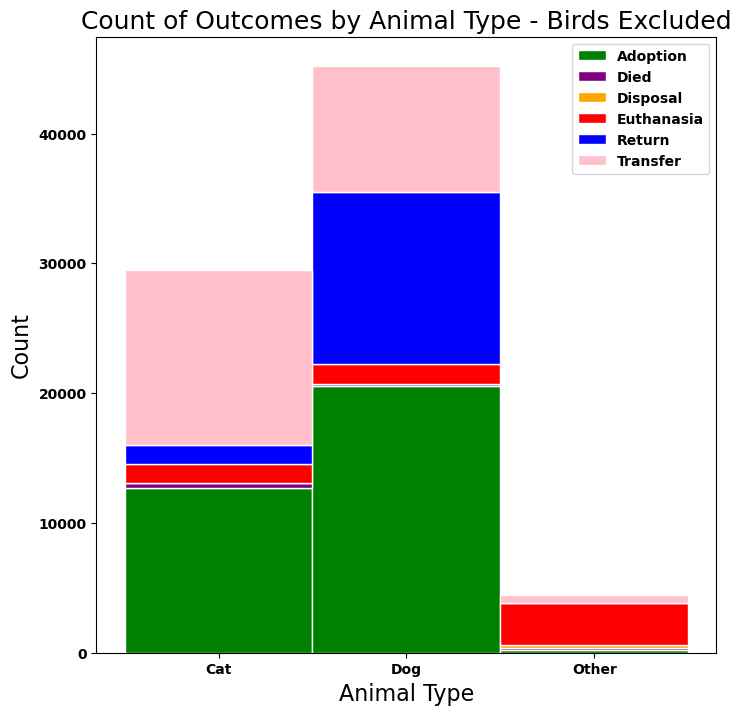

In [29]:
rc('font', weight='bold') # y-axis in bold
r = [1,2,3] # The position of the bars on the x-axis
names = ['Cat', 'Dog', 'Other'] # Names of group and bar width
barWidth = 1
# Create stacked bar plot
plt.figure(figsize=(8,8))
plt.bar(r, A, color='green', edgecolor='white', width=barWidth)
plt.bar(r, D, bottom=A, color='purple', edgecolor='white', width=barWidth)
plt.bar(r, Di, bottom=A+D, color='orange', edgecolor='white', width=barWidth)
plt.bar(r, E, bottom=A+D+Di, color='red', edgecolor='white', width=barWidth)
plt.bar(r, Re, bottom=A+D+Di+E, color='blue', edgecolor='white', width=barWidth)
plt.bar(r, T, bottom=A+D+Di+E+Re, color='pink', edgecolor='white', width=barWidth)
plt.title('Count of Outcomes by Animal Type - Birds Excluded', fontsize=18);
plt.xticks(r, names, fontweight='bold')
plt.xlabel('Animal Type', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend(legend,loc='upper right');
plt.show()

- The stacked bar plot did not include birds as these are 0.4 % of total dataset and their distribution cannot really be appreciated in this plot
- We can see that between cats and dogs, cats get returned to owner relatively less than dogs.
- The majority of "Other" animal type end up with Euthanasia as outcome.
- We conclude that distribution of outcomes is not even acroos animal types.

#### Which animal type is prefered?

To do this we need some metrics. Lets look at possitve and negative metrics:

- For posstive lets look at Adoption and Return to Owner outcomes. In adition to looking at the probability of the outmo happening, we can also find the average time to a possitive outcome. The lower the time to a possitive outcome, the more dessired the animal is.
- For negative metrics we can look at the probability of Stray and Surrender intake types.

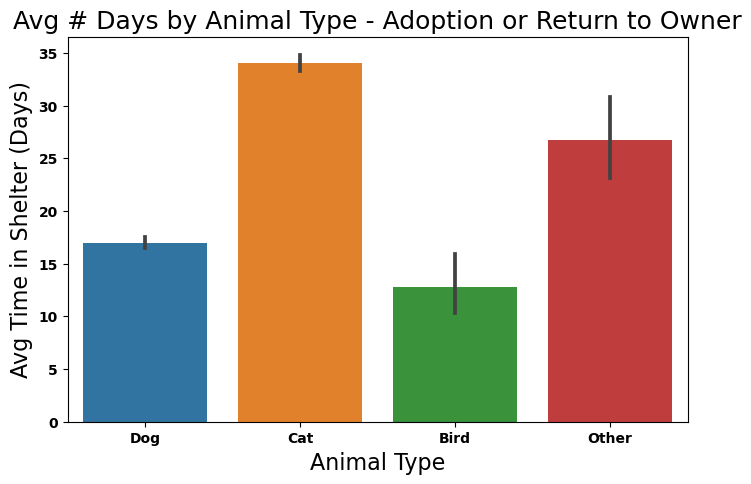

In [32]:
# Assuming df is your DataFrame
adoption = df[df['outcome_type'] == 'Adoption']
to_owner = df[df['outcome_type'] == 'Return to Owner']
positive = pd.concat([adoption, to_owner], ignore_index=True)  # Use pd.concat instead of append

# Plot bar plot (animal type, time in shelter)
plt.figure(figsize=(8, 5))
sns.barplot(x='animal_type', y='time_in_shelter_days', data=positive, estimator=np.mean)
plt.title('Avg # Days by Animal Type - Adoption or Return to Owner', fontsize=18)
plt.xlabel('Animal Type', fontsize=16)
plt.ylabel('Avg Time in Shelter (Days)', fontsize=16)
plt.show()

- An indication of an animal being preferred could be the average number of days in shelter before a possitive outcome. By this metric, the plot above shows us that birds are the most preferred animal type having an avg ~12 days in shelter, with dogs being the second most preferred with an avg ~17 days.

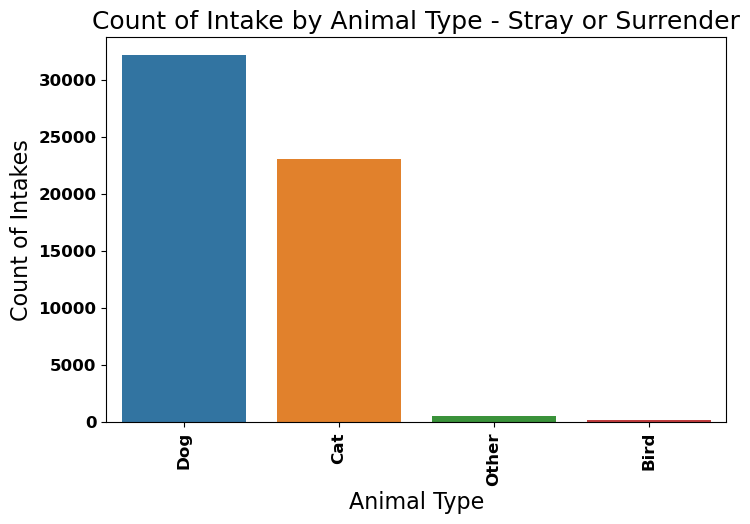

In [34]:
# Assuming df is your DataFrame
stray = df[df['intake_type'] == 'Stray']
surrender = df[df['intake_type'] == 'Surrender']
negative = pd.concat([stray, surrender], ignore_index=True)  # Use pd.concat instead of append

# Plot count plot (animal type, intake type)
plt.figure(figsize=(8, 5))
sns.countplot(x='animal_type', data=negative)
plt.title('Count of Intake by Animal Type - Stray or Surrender', fontsize=18)
plt.xlabel('Animal Type', fontsize=16)
plt.ylabel('Count of Intakes', fontsize=16)
plt.xticks(fontsize=12, rotation='vertical')
plt.yticks(fontsize=12)
plt.show()

- This plot is simply showing us that the there are more dogs that have an intake type of Stray or Surrender than cats. This is consistent with the dataset having more data on Dogs than Cats, so we cannot really conclude that cats are preffered. We need a relative comparison.

##### Dogs vs. Cats
To compare them, lets use the following metrics:

1. % Adopted (outcome type)
2. % Returned to Owner (outcome type)
3. % Stray (intake type)
4. % Owner Surrender (intake type)
5. Avg time (days) in shelter to possitive outcome (Adoption or Return to Owner)

In [39]:
# Assuming df is your DataFrame
# Getting Avg time in shelter to positive outcome for dogs and manipulating so it can be merged to other df
avg_time = positive.groupby(['animal_type'])[['time_in_shelter_days']].mean().reset_index().sort_values(by='time_in_shelter_days', ascending=False)
avg_time_dog = avg_time[avg_time['animal_type'] == 'Dog']
avg_time_dog['animal_type'] = 'Avg # Days in Shelter to Positive Outcome'
avg_time_dog = avg_time_dog.rename(columns={'animal_type': 'criteria', 'time_in_shelter_days': 'value'})

# Getting % metrics for dogs from df
dogs = df[df['animal_type'] == 'Dog']
dogs_by_ot = dogs.groupby(['outcome_type'])[['count']].sum().reset_index().sort_values(by='count', ascending=False)
dogs_count = dogs.shape[0]
dogs_by_ot['value'] = 100 * dogs_by_ot['count'] / dogs_count  # This is percent
dogs_by_ot = dogs_by_ot.rename(columns={'outcome_type': 'criteria'})
top2_dbot = dogs_by_ot.head(2)  # Adoption and return to owner happen to be the top 2

dogs_by_it = dogs.groupby(['intake_type'])[['count']].sum().reset_index().sort_values(by='count', ascending=False)
dogs_by_it['value'] = 100 * dogs_by_it['count'] / dogs_count  # This is percent
dogs_by_it = dogs_by_it.rename(columns={'intake_type': 'criteria'})
top2_dbit = dogs_by_it.head(2)  # Stray and owner surrender happen to be the top 2

# Combining top2_dbit & top2_dbot into one df
dog_spi_0 = pd.concat([top2_dbot, top2_dbit], ignore_index=True)
dog_spi_0 = dog_spi_0.drop(['count'], axis=1)
dog_spi_0['criteria'] = '% ' + dog_spi_0['criteria']

# Combining dog_spi_0 with avg_time_dog
dog_spi = pd.concat([dog_spi_0, avg_time_dog], ignore_index=True)

print(dog_spi)


                                    criteria      value
0                                 % Adoption  45.366574
1                          % Return to Owner  29.257594
2                                    % Stray  70.883481
3                          % Owner Surrender  19.671119
4  Avg # Days in Shelter to Positive Outcome  17.003854


In [42]:
# Grouping dataset by animal type and counting
avg_time_cat = avg_time[avg_time['animal_type'] == 'Cat']
avg_time_cat['criteria'] = 'Avg # Days in Shelter to Positive Outcome'
avg_time_cat = avg_time_cat.rename(columns={'time_in_shelter_days': 'value'})

# Getting % metrics for cats from df
cats = df[df['animal_type'] == 'Cat']
cats_by_ot = cats.groupby(['outcome_type'])[['count']].sum().reset_index().sort_values(by='count', ascending=False)
cats_count = cats.shape[0]
cats_by_ot['value'] = 100 * cats_by_ot['count'] / cats_count  # this is percent
cats_by_ot = cats_by_ot.rename(columns={'outcome_type': 'criteria'})

# Selecting specific rows for adoption and return outcomes
cat_adopt = cats_by_ot.iloc[1:2]
cat_return = cats_by_ot.iloc[3:4]
top2_dbot = pd.concat([cat_adopt, cat_return], ignore_index=True)

# Grouping by intake type and calculating percentages
cats_by_it = cats.groupby(['intake_type'])[['count']].sum().reset_index().sort_values(by='count', ascending=False)
cats_by_it['value'] = 100 * cats_by_it['count'] / cats_count  # this is percent
cats_by_it = cats_by_it.rename(columns={'intake_type': 'criteria'})

# Selecting top 2 intake types
top2_dbit = cats_by_it.head(2)  # stray and owner surrender happen to be the top 2

# Combining top2_dbit & top2_dbot into one df
cat_spi_0 = pd.concat([top2_dbot, top2_dbit], ignore_index=True)
cat_spi_0 = cat_spi_0.drop(['count'], axis=1)
cat_spi_0['criteria'] = '% ' + cat_spi_0['criteria']

# Combining cat_spi_0 with avg_time_cat
cat_spi = pd.concat([cat_spi_0, avg_time_cat], ignore_index=True)
cat_spi

,criteria,value,animal_type
0,% Adoption,42.909374,NaN
1,% Return to Owner,4.979857,NaN
2,% Stray,78.005349,NaN
3,% Owner Surrender,19.523342,NaN
4,Avg # Days in Shelter to Positive Outcome,34.020695,Cat


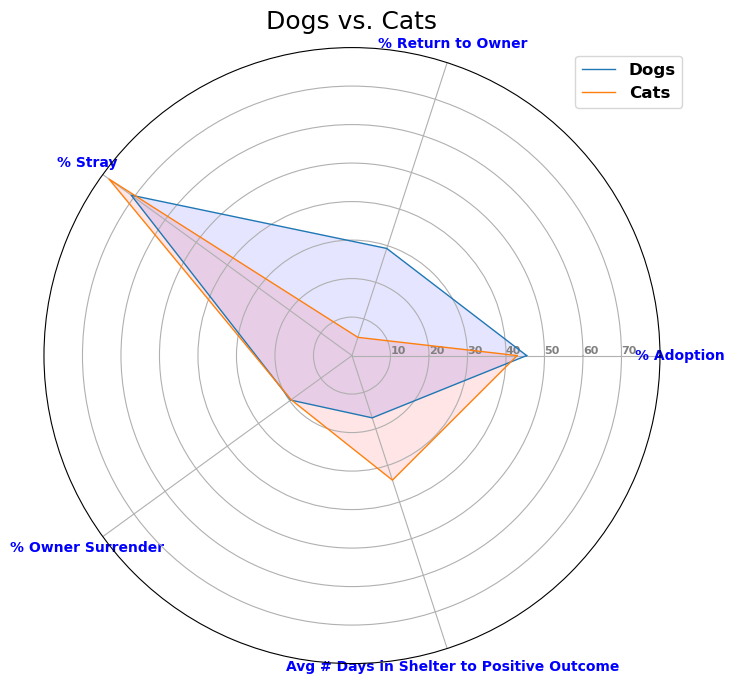

In [43]:
categories = dog_spi['criteria'].tolist()
N = len(categories)
dog_values = dog_spi['value'].values.tolist()
dog_values += dog_values[:1] # need to repeat first value to close loop
cat_values = cat_spi['value'].values.tolist()
cat_values += cat_values[:1] # need to repeat first value to close loop
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
plt.figure(figsize=(8,8))
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
plt.title('Dogs vs. Cats', fontsize=18)
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='blue', size=10)
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30,40,50,60,70], ['10','20','30','40','50','60','70'], color='grey', size=8)
plt.ylim(0,80)
# Plot data
ax.plot(angles, dog_values, linewidth=1, linestyle='solid', label='Dogs')
ax.fill(angles, dog_values, 'b', alpha=0.1)
ax.plot(angles, cat_values, linewidth=1, linestyle='solid', label='Cats')
ax.fill(angles, cat_values, 'r', alpha=0.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1), fontsize=12);


#### We can see that Dogs beat Cats in almost all metrics:

1. % Adopted (outcome type): Dogs are slightly more likely to get adopted than Cats
2. % Returned to Owner (outcome type): Dogs are a lot more likely to be returned to owner than cats. About 6 to 1 ratio.
3. % Stray (intake type): Dogs are less likely to be Stray at intake than cats. This is great for dogs.
4. % Owner Surrender (intake type): Cats and Dogs are surrender in an equal proportion.
5. Avg time (days) in shelter to possitive outcome (Adoption or Return to Owner): Avg # days is in shelter is less for Dogs, meaning they are more desired than cats.

#### PitBulls vs other breeds

We wil follow a similar approach for comparing Pit Bulls with other Breeds, but we will split 'Avg # Days to Possitive Outcome' in two metrics, 'Avg # Days to Adoption' and 'Avg # Days to Return'.  These metrics will allow for better interpretation of the results.

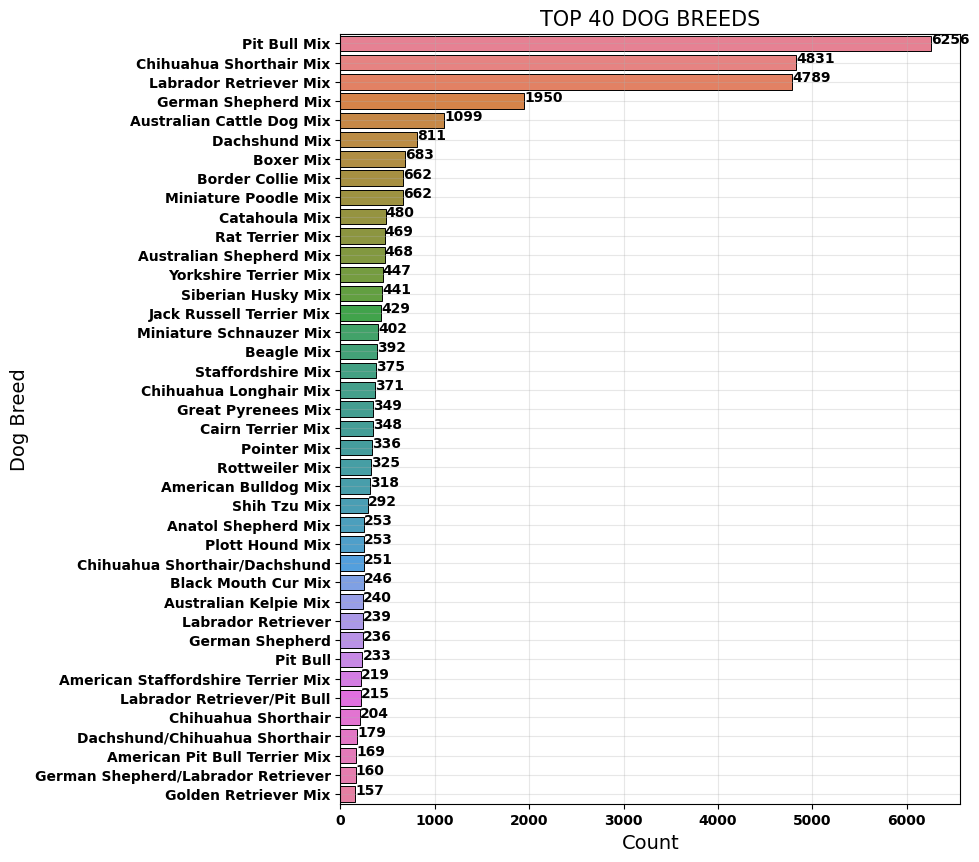

In [46]:
# Grouping dataset by breed and counting
breed = dogs.groupby(['breed'])[['count']].sum().reset_index().sort_values(by='count', ascending=False)
breed_40 = breed.head(40)

# Bar plot
fig, ax = plt.subplots(figsize=(8, 10))
sns.barplot(x='count', y='breed', data=breed_40, palette='husl', linewidth=0.7, edgecolor='k')  # hls/husl chooses the palette based on evenly spaced colors taken out from a circular color space. husl controls for color intensity.
ax.set_ylabel('Dog Breed', fontsize=14)
ax.set_xlabel('Count', fontsize=14)
ax.set_title('TOP 40 DOG BREEDS', fontsize=15)

# Adding text labels
for i, j in enumerate(breed_40['breed']):
    ax.text(breed_40['count'].iloc[i] + 0.5, i, str(breed_40['count'].iloc[i]), weight='bold', fontsize=10)

plt.grid(True, alpha=0.3)
plt.show()


- At Austin Animal Shelter, there are more Pit Bull Mix than any other dog breed.

In [49]:
# Creating a column to indicate if breed is pit bull or pit bull mix (Y) or other (N)
dogs['Pit Bull'] = np.where(dogs['breed'].str.contains('Pit Bull'), 'Y', 'N')

# Calculating average time to adoption for Pit Bulls
adoption = dogs[dogs['outcome_type'] == 'Adoption']
avg_time_adopt = adoption.groupby(['Pit Bull'])[['time_in_shelter_days']].mean().reset_index().sort_values(by='time_in_shelter_days', ascending=False)
avg_time_adopt_pit = avg_time_adopt[avg_time_adopt['Pit Bull'] == 'Y']
avg_time_adopt_pit['Pit Bull'] = 'Avg # Days to Adoption'
avg_time_adopt_pit = avg_time_adopt_pit.rename(columns={'Pit Bull': 'criteria', 'time_in_shelter_days': 'value'})

# Calculating average time to return to owner for Pit Bulls
to_owner = dogs[dogs['outcome_type'] == 'Return to Owner']
avg_time_return = to_owner.groupby(['Pit Bull'])[['time_in_shelter_days']].mean().reset_index().sort_values(by='time_in_shelter_days', ascending=False)
avg_time_return_pit = avg_time_return[avg_time_return['Pit Bull'] == 'Y']
avg_time_return_pit['Pit Bull'] = 'Avg # Days to Return to Owner'
avg_time_return_pit = avg_time_return_pit.rename(columns={'Pit Bull': 'criteria', 'time_in_shelter_days': 'value'})

# Combining average time to adoption and return to owner
avg_time_pit = pd.concat([avg_time_adopt_pit, avg_time_return_pit], ignore_index=True)

# Getting % metrics for Pit Bulls from dogs
pits = dogs[dogs['Pit Bull'] == 'Y']
pits_by_ot = pits.groupby(['outcome_type'])[['count']].sum().reset_index().sort_values(by='count', ascending=False)
pits_count = pits.shape[0]
pits_by_ot['value'] = 100 * pits_by_ot['count'] / pits_count  # this is percent
pits_by_ot = pits_by_ot.rename(columns={'outcome_type': 'criteria'})

# Selecting top 2 outcomes
top2_dbot = pits_by_ot.head(2)  # adoption and return to owner happen to be the top 2

# Grouping by intake type and calculating percentages
pits_by_it = pits.groupby(['intake_type'])[['count']].sum().reset_index().sort_values(by='count', ascending=False)
pits_by_it['value'] = 100 * pits_by_it['count'] / pits_count  # this is percent
pits_by_it = pits_by_it.rename(columns={'intake_type': 'criteria'})

# Selecting top 2 intake types
top2_dbit = pits_by_it.head(2)  # stray and owner surrender happen to be the top 2

# Combining top2_dbit & top2_dbot into one df
pit_spi_0 = pd.concat([top2_dbot, top2_dbit], ignore_index=True)
pit_spi_0 = pit_spi_0.drop(['count'], axis=1)
pit_spi_0['criteria'] = '% ' + pit_spi_0['criteria']

# Combining pit_spi_0 with avg_time_pit
pit_spi = pd.concat([pit_spi_0, avg_time_pit], ignore_index=True)
pit_spi


,criteria,value
0,% Adoption,36.994832
1,% Return to Owner,35.471048
2,% Stray,66.410494
3,% Owner Surrender,19.279184
4,Avg # Days to Adoption,50.084543
5,Avg # Days to Return to Owner,8.031515


In [51]:
# Grouping dataset by animal type and counting
avg_time_adopt_other = avg_time_adopt[avg_time_adopt['Pit Bull'] == 'N']
avg_time_adopt_other['criteria'] = 'Avg # Days to Adoption'
avg_time_adopt_other = avg_time_adopt_other.rename(columns={'time_in_shelter_days': 'value'})

avg_time_return_other = avg_time_return[avg_time_return['Pit Bull'] == 'N']
avg_time_return_other['criteria'] = 'Avg # Days to Return to Owner'
avg_time_return_other = avg_time_return_other.rename(columns={'time_in_shelter_days': 'value'})

# Combining average time to adoption and return
avg_time_other = pd.concat([avg_time_adopt_other, avg_time_return_other], ignore_index=True)

# Getting % metrics for non-Pit Bulls from dogs
others = dogs[dogs['Pit Bull'] == 'N']
others_by_ot = others.groupby(['outcome_type'])[['count']].sum().reset_index().sort_values(by='count', ascending=False)
others_count = others.shape[0]
others_by_ot['value'] = 100 * others_by_ot['count'] / others_count  # this is percent
others_by_ot = others_by_ot.rename(columns={'outcome_type': 'criteria'})

# Selecting top 2 outcomes
top2_dbot = others_by_ot.head(2)  # adoption and return to owner happen to be the top 2

# Grouping by intake type and calculating percentages
others_by_it = others.groupby(['intake_type'])[['count']].sum().reset_index().sort_values(by='count', ascending=False)
others_by_it['value'] = 100 * others_by_it['count'] / others_count  # this is percent
others_by_it = others_by_it.rename(columns={'intake_type': 'criteria'})

# Selecting top 2 intake types
top2_dbit = others_by_it.head(2)  # stray and owner surrender happen to be the top 2

# Combining top2_dbit & top2_dbot into one df
other_spi_0 = pd.concat([top2_dbot, top2_dbit], ignore_index=True)
other_spi_0 = other_spi_0.drop(['count'], axis=1)
other_spi_0['criteria'] = '% ' + other_spi_0['criteria']

# Combining other_spi_0 with avg_time_other
other_spi = pd.concat([other_spi_0, avg_time_other], ignore_index=True)
other_spi


,criteria,value,Pit Bull
0,% Adoption,47.037204,NaN
1,% Return to Owner,28.017663,NaN
2,% Stray,71.776091,NaN
3,% Owner Surrender,19.749332,NaN
4,Avg # Days to Adoption,20.696174,N
5,Avg # Days to Return to Owner,4.355212,N


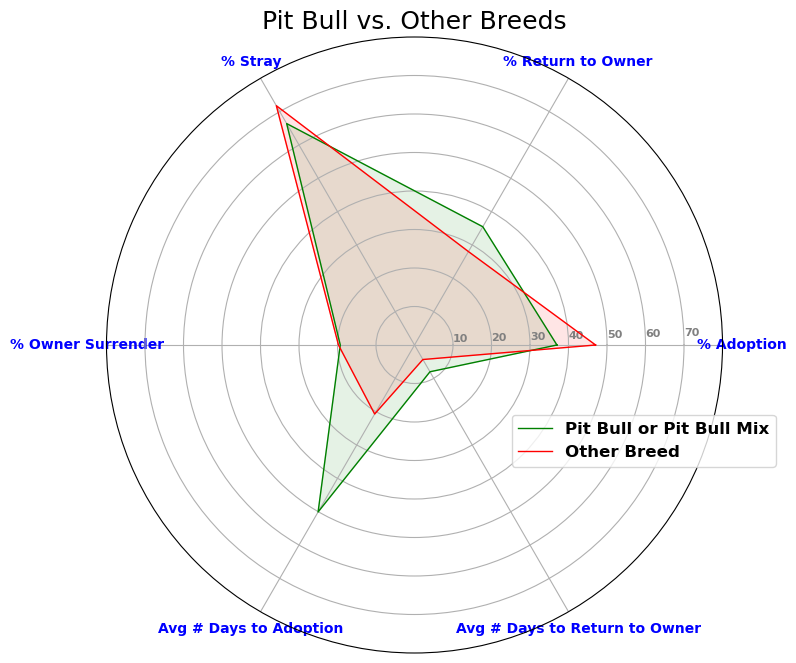

In [55]:
categories = pit_spi['criteria'].tolist()
N = len(categories)
pit_values = pit_spi['value'].values.tolist()
pit_values += pit_values[:1] # need to repeat first value to close loop
other_values = other_spi['value'].values.tolist()
other_values += other_values[:1] # need to repeat first value to close loop
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
plt.figure(figsize=(8,8))
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
plt.title('Pit Bull vs. Other Breeds', fontsize=18)
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='blue', size=10)
# Draw ylabels
ax.set_rlabel_position(1.5)
plt.yticks([10,20,30,40,50,60,70], ['10','20','30','40','50','60','70'], color='grey', size=8)
plt.ylim(0,80)
# Plot data
ax.plot(angles, pit_values, color='green', linewidth=1, linestyle='solid', label='Pit Bull or Pit Bull Mix')
ax.fill(angles, pit_values, color='green', alpha=0.1)
ax.plot(angles, other_values, color='red', linewidth=1, linestyle='solid', label='Other Breed')
ax.fill(angles, other_values, color='red', alpha=0.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, .4), fontsize=12);

### Pit Bull vs. Other Breeds Insigths:

1. % Adopted (outcome type): Other dog breeds are more likely to get adopted than Pit Bulls. ~47% vs ~37%.
2. % Returned to Owner (outcome type): Pit Bulls are more likely to be returned to owner than other dog breeds. This is more an indication that Pit Bull owners are more attached to their dogs, being more likely to go to shelter looking for their lost pet.
3. % Stray (intake type): It is less likely to have a Stray intake type Pit Bull than Other Breed, althought the numbers are really close. This is also associated about how much pet owners care about them. The more they care, the less the number of Strays.
4. % Owner Surrender (intake type): Pit Bulls and Other Breeds are surrendered in an equal proportion. This is consistent with the Dog vs. Cat radar, indicating that this decision in not influenced by the animal but rather external considtions such as financial.
5. Avg time (days) in shelter to Adoption: Avg # days in shelter for Other Breeds is ~20 days, less than half that for Pit Bulls ~50 days. This is an indication they are more desired than Pit Bulls.
6. Avg time (days) in shelter to Return to Owner: Avg # days in shelter for other breeds is ~4 days, about half that for Pit Bulls ~8 days. From this one and #2 (% Return to Owner), we conclude that even though Pit Bull owners are more likely to reclaim their dog, they take a little longer than other dog owners.

- Findings 1 and 5 validate the hypothesis that Pit Bulls are less desired than other Dog breeds. I think this bad reputation is because there are a number of myths and stereotypes about "pitbull-type" dogs that are either anecdotal and misleading or entirely false. For facts and reliable information about Pit Bull type dogs, refer to https://www.pitbullinfo.org/. On the flip side, from findings 2 and 3 we can imply that those who took a chance on having a Pit Bull are more attached to them, because they are indeed amazing dogs.

*If you are considering getting a pet, please consider adopting. If getting a dog, I strongly suggest you read the facts in link above before swinging by an Animal Shelter, so that you make an informed decision. Pit Bull or not (although, the numbers show Pit Bull owners are more attached to them, wonder why?), as long as you adopt, you will potentially be saving a life that will bring a lot of joy to yours.*